In [25]:
def show2imgs(im1, im2, title1='Obraz pierwszy', title2='Obraz drugi', size=(10,10)):
    
    import matplotlib.pyplot as plt
    
    f, (ax1, ax2) = plt.subplots(1,2, figsize=size)
    ax1.imshow(im1, cmap='gray')
    ax1.axis('off')
    ax1.set_title(title1)

    ax2.imshow(im2, cmap='gray')
    ax2.axis('off')
    ax2.set_title(title2)
    plt.show()

### Detekcja krawędzi :: Canny

Udoskonalony filtr Laplace'a opracowany w 1986 r. autorstwa J. Canny. W algorytmie tym pochodne są obliczane  kierunkach $x$ i $y$  po czym z ich kombinacji wyznaczane są cztery pochodne kierunkowe (*gradienty*). Punkty maksymalnych wartości tych pochodnych są potencjalnymi elementami krawędzi. Najważniejszym elementem tego algorytmu jest faza, w której następuje łaczenie pojedynczych pikseli wskazywanych jako elementy krawędzi w kontury.

Formowanie konturów odbywa się w procesie nazywanym progowaniem z histerezą (ang. *hysteresis threshold*). Zalecane proporcje między progami to $2:1$ i $3:1$.

Obliczanie gradientów:

** $L2gradient = True$, wiariant dokładniejszy 
$$|grad(x,y)|_{L2} = \sqrt{\frac{dI}{dx}^2 + \frac{dI}{dy}^2}$$

** $L2gradient = False$, wiariant uproszczony
$$|grad(x,y)|_{L2} = \left|\frac{dI}{dx}\right| + \left|\frac{dI}{dy}\right|$$

120.0


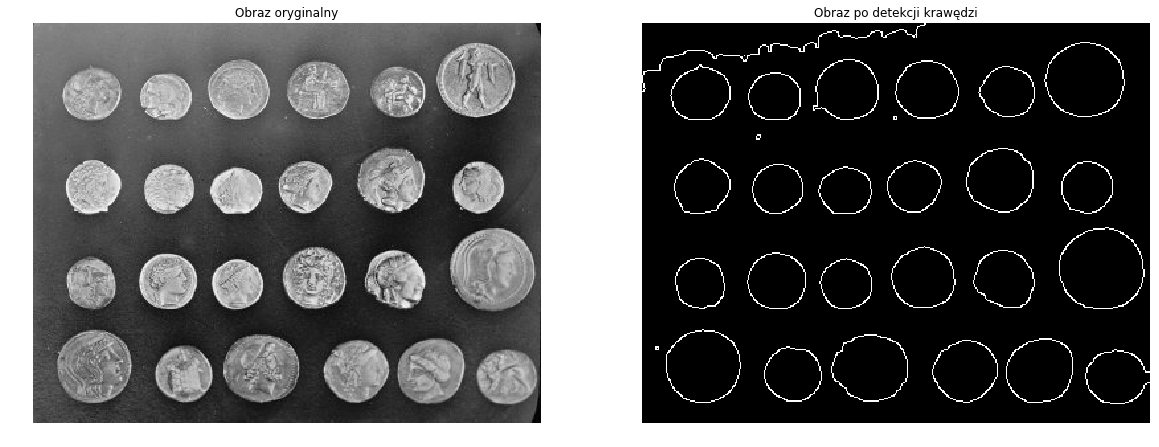

In [26]:
import cv2
from skimage import data
import numpy as np

im = data.coins()

th = 120
th, bim = cv2.threshold(im, thresh=th, maxval=255, type=cv2.THRESH_BINARY)
print(th)

element = np.ones((3,3),np.uint8)
mbim = cv2.morphologyEx(bim, op=cv2.MORPH_CLOSE, kernel=element, iterations=3)

cim = cv2.Canny(mbim, 200, 250, apertureSize = 5, L2gradient = True)

show2imgs(im, cim, title1='Obraz oryginalny', title2='Obraz po detekcji krawędzi', size=(20,20))

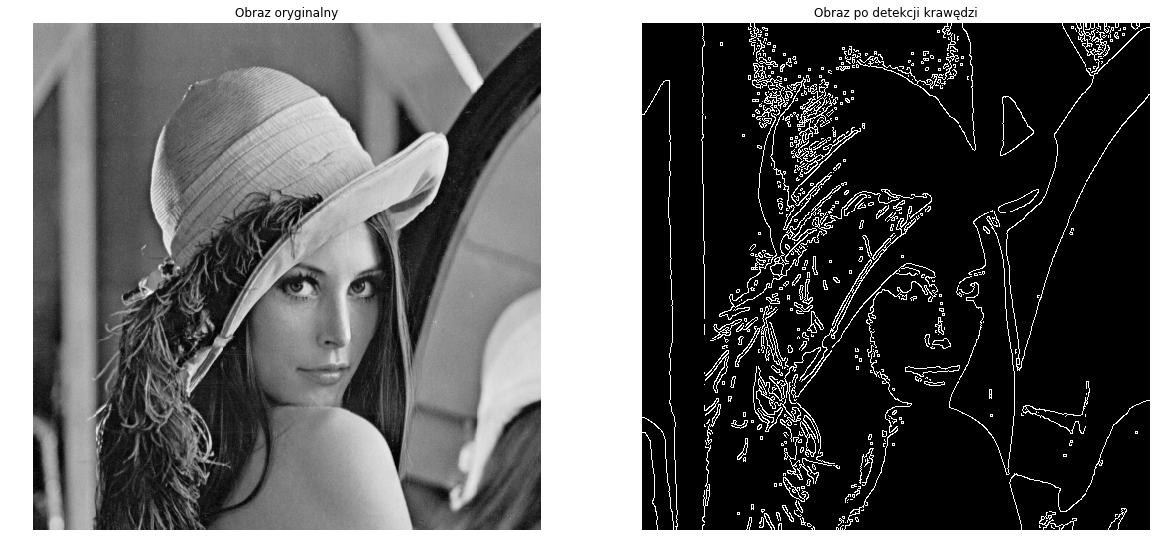

In [27]:
from skimage import io, color, img_as_ubyte

import warnings
warnings.filterwarnings('ignore')

url = 'http://www.lenna.org/lena_std.tif'
lena = io.imread(url)
lena = color.rgb2gray(lena)
lena = img_as_ubyte(lena) 

th = 150
th, blena = cv2.threshold(lena, thresh=th, maxval=255, type=cv2.THRESH_OTSU)

clena = cv2.Canny(blena, threshold1=200, threshold2=250, apertureSize = 5, L2gradient = False)

show2imgs(lena, clena, title1='Obraz oryginalny', title2='Obraz po detekcji krawędzi', size=(20,20))

103.0


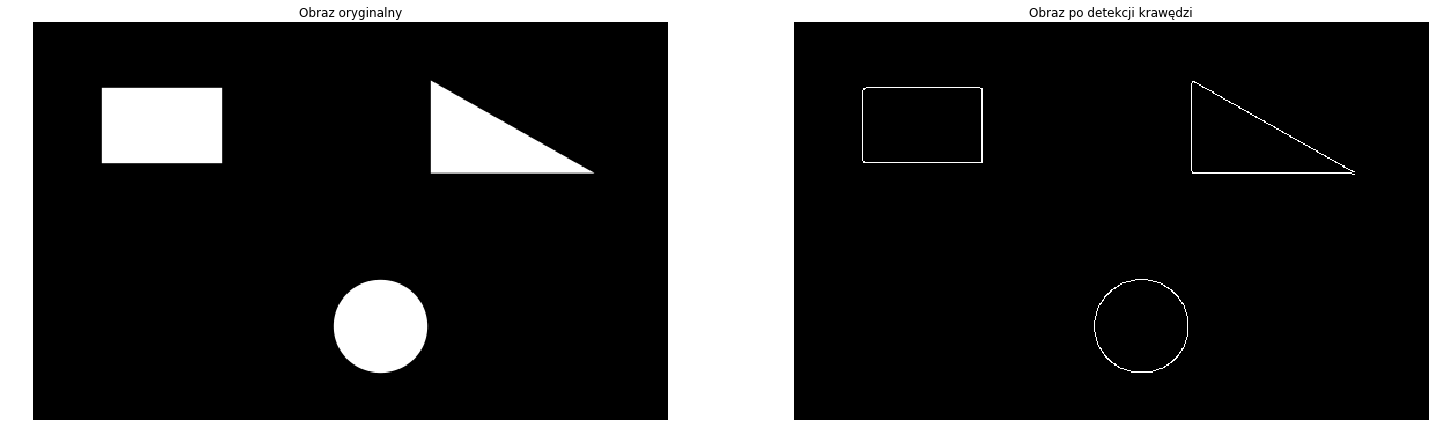

In [28]:
from skimage import io, color, img_as_ubyte, util

import warnings
warnings.filterwarnings('ignore')

url = 'images/pattern1.png'
p = io.imread(url)
p = color.rgb2gray(p)
p = img_as_ubyte(p) 
p = util.invert(p)

th = 150
th, bp = cv2.threshold(p, thresh=th, maxval=255, type=cv2.THRESH_OTSU)
print(th)

cp = cv2.Canny(bp, threshold1=200, threshold2=250, apertureSize = 5, L2gradient = False)

show2imgs(p, cp, title1='Obraz oryginalny', title2='Obraz po detekcji krawędzi', size=(25,25))

### Transformacja odległościowa

Transformacja odległościowa (ang. *distance transform*) to proces, w ramach którego każdy piksel wejściowy jest ustawiany na wartość równą odległści od najbliższego zerowego piskela w obrazie wejściowym. Wymagane jest przyjęcie pewnej miary odległości.Typowym obrazem wejściowym tej transformacji jest obraz krawędzi.


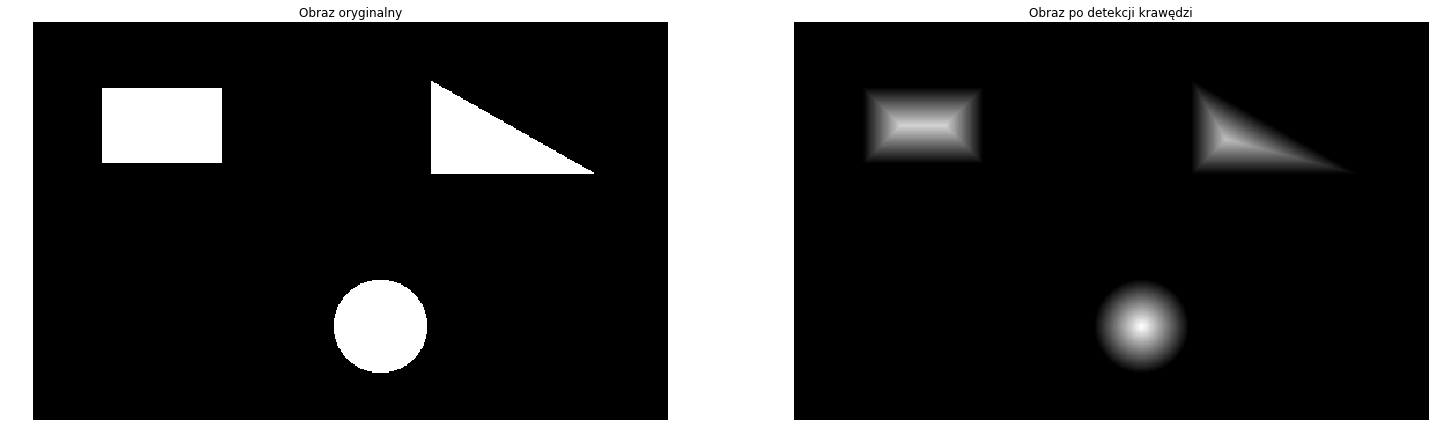

In [29]:
icp = util.invert(cp)

dt = cv2.distanceTransform(bp, distanceType=cv2.DIST_L2, maskSize=cv2.DIST_MASK_PRECISE)

show2imgs(bp, dt, title1='Obraz oryginalny', title2='Obraz po detekcji krawędzi', size=(25,25))

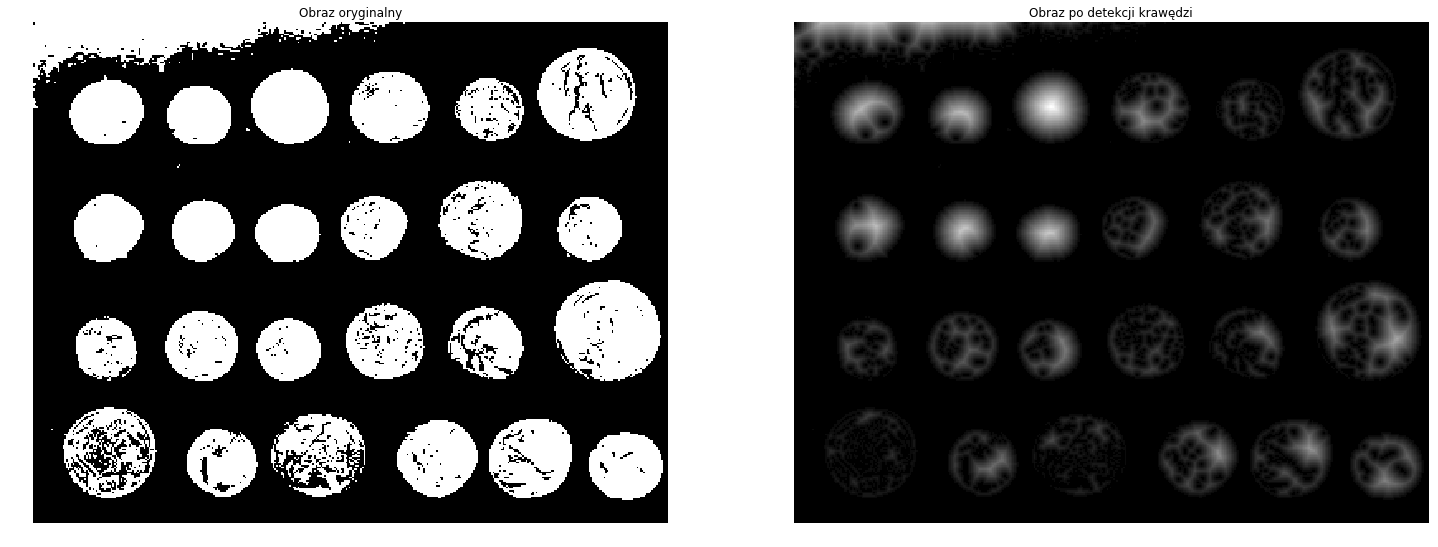

In [30]:
icim = util.invert(cim)

dt = cv2.distanceTransform(bim, distanceType=cv2.DIST_L2, maskSize=cv2.DIST_MASK_PRECISE)

show2imgs(bim, dt, title1='Obraz oryginalny', title2='Obraz po detekcji krawędzi', size=(25,25))

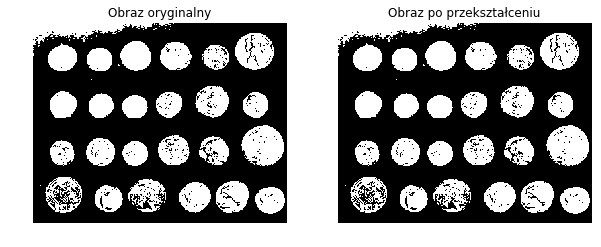

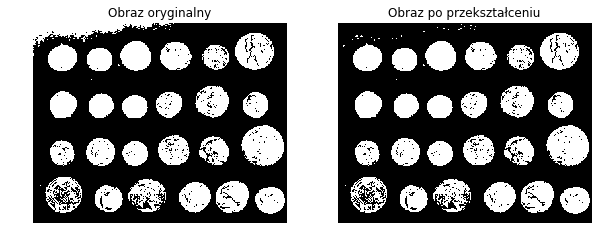

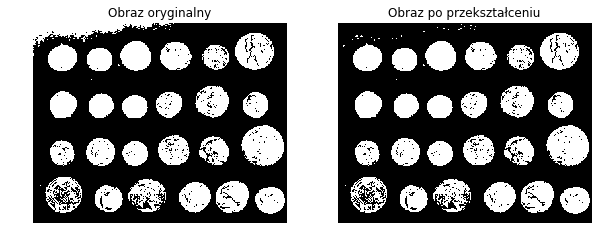

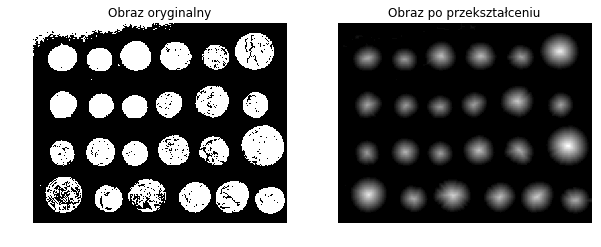

In [31]:
from skimage import segmentation

element = np.ones((3,3),np.uint8)
mbim2 = cv2.erode(bim, kernel=element, iterations=0)
show2imgs(bim, mbim2, title1='Obraz oryginalny', title2='Obraz po przekształceniu', size=(10,10))

im_border = segmentation.clear_border(mbim2, buffer_size=1)
show2imgs(bim, im_border, title1='Obraz oryginalny', title2='Obraz po przekształceniu', size=(10,10))

element = np.ones((3,3),np.uint8)
mbim2 = cv2.morphologyEx(im_border, op=cv2.MORPH_CLOSE, kernel=element, iterations=3)
show2imgs(bim, im_border, title1='Obraz oryginalny', title2='Obraz po przekształceniu', size=(10,10))

dt = cv2.distanceTransform(mbim2, distanceType=cv2.DIST_L2, maskSize=cv2.DIST_MASK_PRECISE)
show2imgs(bim, dt, title1='Obraz oryginalny', title2='Obraz po przekształceniu', size=(10,10))

In [32]:
print(dt.min(), dt.max())

0.0 30.016663
